# Обработка звука с помощью Python

Аудио-сигнал можно описать через параметры, например, через частоту, полосу пропускания, децибелы и т. д. Типичный аудиосигнал может быть выражен как функция амплитуды и времени.

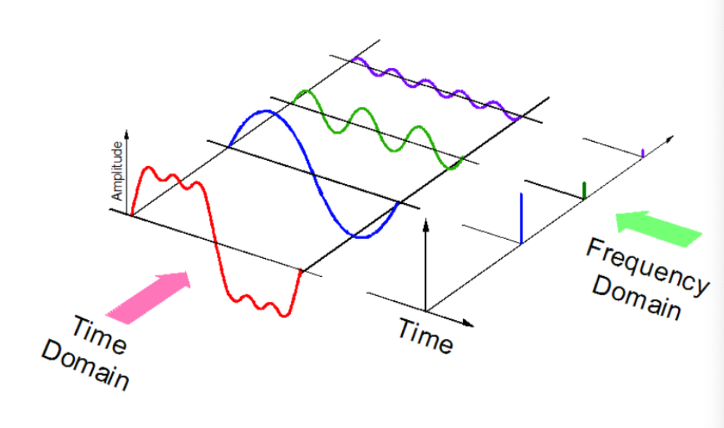

Записанный звуковой сигнал может быть доступен в разных форматах, в том числе в:

* формат mp3
* формат WMA (Windows Media Audio)
* формат wav (аудиофайл формы сигнала)


In [30]:
import librosa # модуль Python для анализа аудиосигналов

In [2]:
# Загрузка аудиофайла

audio_path = '/content/Озон - В доме-Philippe Rombi -02-Generique Debut-kissvk.com.mp3'
x , sr = librosa.load(audio_path)

print(type(x), type(sr)) # возвращает временной ряд аудио в виде массива numpy 

<class 'numpy.ndarray'> <class 'int'>


In [3]:
print(x.shape, sr) # с частотой дискретизации по умолчанию (sr) 22 кГц моно. 

(2488416,) 22050


In [4]:
librosa.load(audio_path, sr=44100) # можно поменять на привычне 44100

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.6293945e-05,
        4.5776367e-05, 6.1035156e-05], dtype=float32), 44100)

In [5]:
librosa.load(audio_path, sr=None) # чтобы отключить повторный выбор

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.6293945e-05,
        4.5776367e-05, 6.1035156e-05], dtype=float32), 44100)

***(!) Частота дискретизации - это количество отсчетов звука, передаваемых в секунду, измеренное в Гц или кГц.***

In [6]:
import IPython.display as ipd # позволяет воспроизводить звук прямо в ноутбуке jupyter.
ipd.Audio(audio_path)

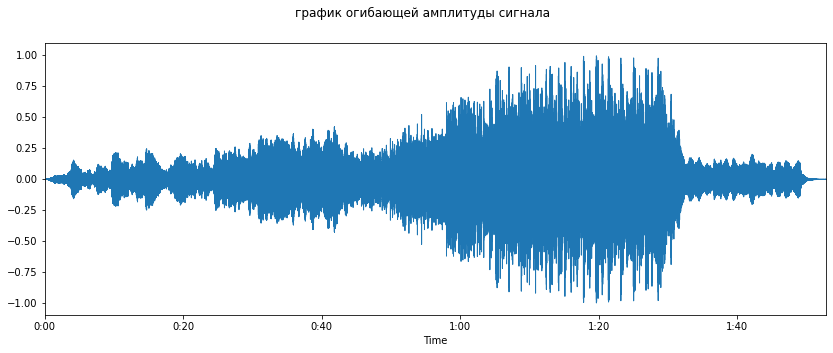

In [33]:
# отрисовка звука

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5));
plt.suptitle("график огибающей амплитуды сигнала");
librosa.display.waveplot(x, sr=sr);



**Спектрограмма** - изображение, показывающее зависимость спектральной плотности мощности сигнала от времени.  
На графике: первая ось - это частота, а вторая - время.


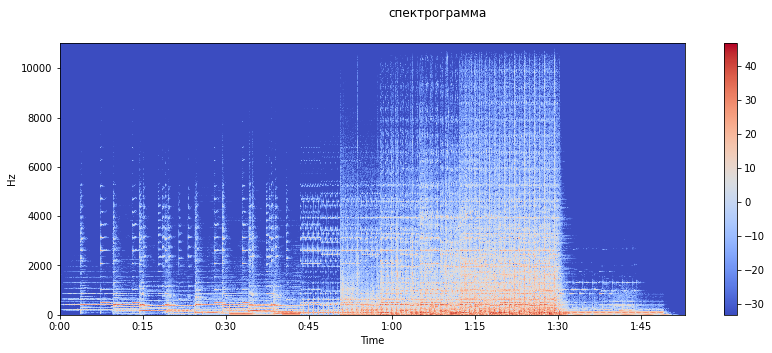

In [34]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5));
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();
plt.suptitle("спектрограмма");

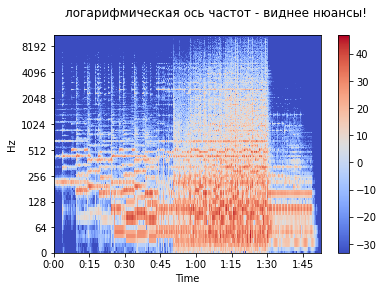

In [35]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.suptitle("логарифмическая ось частот - виднее нюансы!");

In [36]:
librosa.output.write_wav('example.wav', x, sr) # сохраняет массив NumPy в файл WAV.

## Создание звукового сигнала

Cоздадим звуковой сигнал на 220 Гц. Аудиосигнал представляет собой числовой массив (numpy array), поэтому мы создадим его и передадим в аудио-функцию.

In [37]:
import numpy as np
sr = 22050 # частота дискретизации
T = 5.0    # секунды
t = np.linspace(0, T, int(T*sr), endpoint=False) # функция времени
x = 0.5*np.sin(2*np.pi*220*t)# чистая синусоида при 220 Гц

In [38]:
# Воспроизведение аудио

ipd.Audio(x, rate=sr) # загрузка NumPy-массива

In [39]:
# Сохранение аудио

librosa.output.write_wav('tone_220.wav', x, sr)

## Извлечение признаков

Каждый звуковой сигнал состоит из множества функций. Искусство состоит в том, чтобы выделить характеристики, относящиеся к решаемой нами проблеме.

**1. Zero-crossing rate**
(https://en.wikipedia.org/wiki/Zero-crossing_rate)
это количество раз, когда сигнал меняет знак в течение определенного периода времени (обычно одна секунда). То есть интересует скорость, с которой сигнал переходит от отрицательного к положительному или наоборот. (Кстати, если посмотреть, сколько раз он переходит от отрицательного к положительному, можно использовать его в качестве прокси для частоты сигнала).

Эта функция широко используется как для распознавания речи, так и для поиска музыкальной информации. 
Где имеет смысл применять? Распознавание речи (сегментация речевого потока), классификация музыкальных жанров (к примеру, вычисление основного тона), детекции монтажа, работа с шумом (реставрация)...

В плане восприятия значение частоты пересечения нуля соответствует общей оценке тембра звучания по шкале высокая частота/низкая частота, глухой/звонкий, шипящий/свистящий.

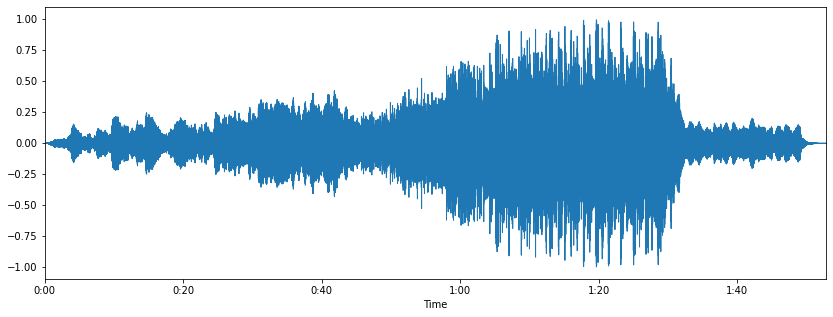

In [40]:
x, sr = librosa.load('/content/Озон - В доме-Philippe Rombi -02-Generique Debut-kissvk.com.mp3')
plt.figure(figsize=(14, 5));
librosa.display.waveplot(x, sr=sr);

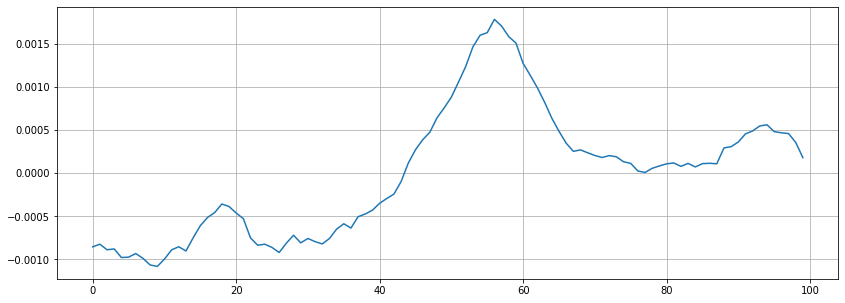

In [17]:
# Переформат для лучшего прочтения (zoom)
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [41]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings), '<--- то, что мы видим на рисунке, соответствует тому, что подсчитали автоматически')

1 <--- то, что мы видим на рисунке, соответствует тому, что подсчитали автоматически


**2. Спектральный центроид** (https://en.wikipedia.org/wiki/Spectral_centroid). Он указывает, где расположен "центр тяжести" звука, рассчитывается как средневзвешенное значение частот. Используется в качестве индикации относительно яркости в музыкальном анализе и классификации жанров. Также спектральный центроид используется, чтобы классифицировать речь: центроид переходит в областях неречевой речи.

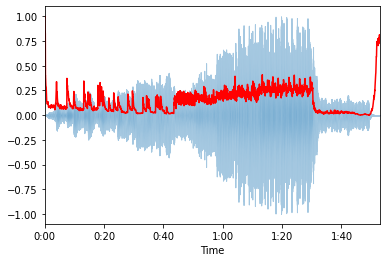

In [43]:
from sklearn.preprocessing import minmax_scale

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Вычисление временной переменной для визуализации 
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации 
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)
# Построение спектрального центроида вдоль формы волны 
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

**3. Spectral Rolloff** - относительная частота, в пределах которой которой сосредоточена определенная часть всей энергии спектра. По сути речь идет о мере формы сигнала. Он представляет собой частоту, ниже которой находится определенный процент от общей спектральной энергии.

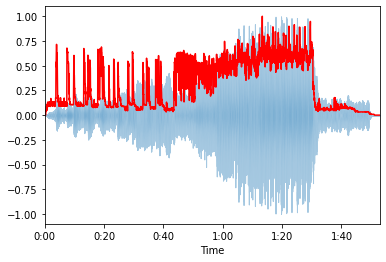

In [44]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0] # вычисляет частоту спада для каждого кадра в сигнале
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r');

<b>4. Кепстральные коэффициенты Mel-частоты</b> (https://en.wikipedia.org/wiki/Mel-frequency_cepstrum). Кепстральные коэффициенты частоты Mel (MFCC) сигнала - это небольшой набор характеристик (обычно около 10–20), которые кратко описывают общую форму спектральной огибающей. 

итак, берем аудио

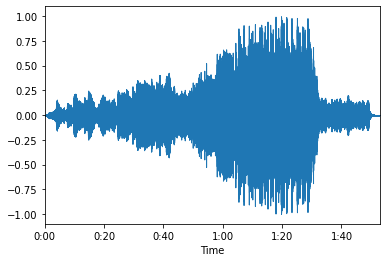

In [48]:
x, fs = librosa.load('/content/Озон - В доме-Philippe Rombi -02-Generique Debut-kissvk.com.mp3')
librosa.display.waveplot(x, sr=sr);

In [49]:
mfccs = librosa.feature.mfcc(x, sr=fs) # вычисляет MFCC для аудиосигнала
print(mfccs.shape)

(20, 4861)


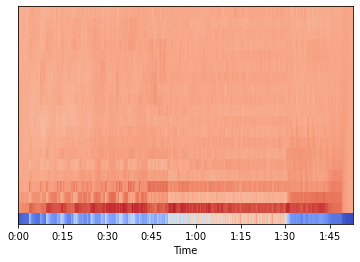

In [53]:
#Отображение MFCC
librosa.display.specshow(mfccs, sr=sr, x_axis='time');

mfcc вычислил 20 MFCC для 4861 кадров.

<p>масштабирование признаков так, чтобы каждое измерение коэффициента имело нулевое среднее значение и единичную дисперсию:

In [55]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 2.33875412e-17  3.50813118e-17  0.00000000e+00 -3.50813118e-17
  0.00000000e+00  0.00000000e+00 -2.33875412e-17 -4.67750824e-17
 -2.33875412e-17  4.67750824e-17  1.16937706e-17  0.00000000e+00
 -2.33875412e-17  7.01626236e-17 -2.33875412e-17  0.00000000e+00
  4.67750824e-17  5.84688530e-18 -4.67750824e-17 -2.33875412e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


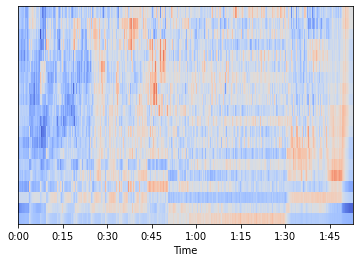

In [56]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time');

<b>5. Chroma Frequencies</b>. весь спектр проецируется на 12 интервалов, представляющих 12 различных полутонов (или цветность) музыкальной октавы.

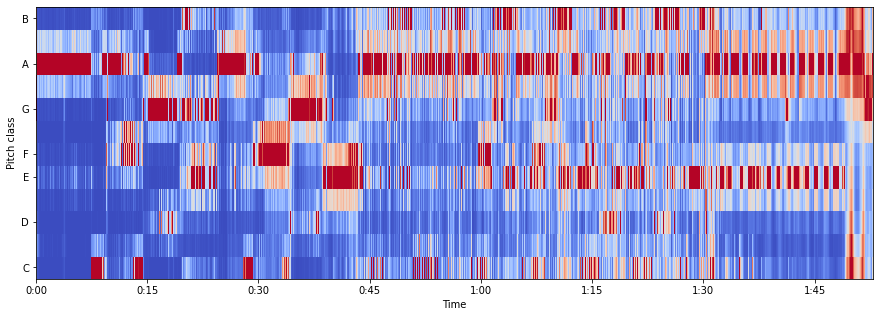

In [57]:
x, sr = librosa.load('/content/Озон - В доме-Philippe Rombi -02-Generique Debut-kissvk.com.mp3')
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5));
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');